In [2]:
import matplotlib.pyplot as plt
import matplotlib.dates as md
from matplotlib.ticker import MaxNLocator
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
import json
from scipy.stats import linregress
import scipy.stats as st
import csv
import os
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns
from datetime import datetime, timedelta

sealevel_path = "Resources/GMSL_TPJAOS_5.1.csv"
sea_df = pd.read_csv(sealevel_path)



In [3]:
sea_df.columns

Index(['altimeter_type', 'merged_file_cycle', 'year_fraction',
       'num_observations', 'weighted_observations', 'GMSL_variation_no_GIA',
       'std_dev_no_GIA', 'smoothed_GMSL_no_GIA', 'GMSL_variation_with_GIA',
       'std_dev_with_GIA', 'smoothed_GMSL_with_GIA',
       'GMSL_removed_annual_signal_no_GIA',
       'GMSL_removed_annual_signal_with_GIA'],
      dtype='object')

In [4]:
clean_sea_df = sea_df.iloc[:, [2,5,6,7,8,9,10,11,12]]
clean_sea_df

,year_fraction,GMSL_variation_no_GIA,std_dev_no_GIA,smoothed_GMSL_no_GIA,GMSL_variation_with_GIA,std_dev_with_GIA,smoothed_GMSL_with_GIA,GMSL_removed_annual_signal_no_GIA,GMSL_removed_annual_signal_with_GIA
0,1993.011526,-37.91,89.01,-37.67,-37.90,89.01,-37.66,-37.64,-37.65
1,1993.038692,-40.95,89.95,-39.07,-40.94,89.95,-39.06,-38.53,-38.54
2,1993.065858,-41.09,86.90,-39.11,-41.07,86.90,-39.09,-38.16,-38.18
3,1993.093025,-43.38,88.73,-39.40,-43.36,88.73,-39.38,-38.12,-38.14
4,1993.120191,-38.66,89.87,-38.51,-38.63,89.87,-38.48,-36.96,-36.99
...,...,...,...,...,...,...,...,...,...
1159,2024.503705,62.31,85.23,62.63,69.98,85.35,70.31,72.98,65.30
1160,2024.530797,64.13,85.50,62.54,71.85,85.81,70.24,71.99,64.29
1161,2024.557889,61.93,88.04,62.49,69.63,88.43,70.18,70.87,63.18
1162,2024.584981,62.00,88.66,62.45,69.70,89.11,70.15,69.69,61.99


In [5]:
def convert_decimal_year_to_date(decimal_year):
    year = int(decimal_year)
    days_in_year = 366 if (year % 4 == 0 and year % 100 != 0) or (year % 400 == 0) else 365
    days = (decimal_year - year) * days_in_year
    date = datetime(year, 1, 1) + timedelta(days=int(days))
    return date.strftime("%Y/%m/%d")


clean_sea_df["date_formatted"] = clean_sea_df ['year_fraction'].apply(convert_decimal_year_to_date)
clean_sea_df

C:\Users\thegr\AppData\Local\Temp\ipykernel_91564\200188025.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_sea_df["date_formatted"] = clean_sea_df ['year_fraction'].apply(convert_decimal_year_to_date)


,year_fraction,GMSL_variation_no_GIA,std_dev_no_GIA,smoothed_GMSL_no_GIA,GMSL_variation_with_GIA,std_dev_with_GIA,smoothed_GMSL_with_GIA,GMSL_removed_annual_signal_no_GIA,GMSL_removed_annual_signal_with_GIA,date_formatted
0,1993.011526,-37.91,89.01,-37.67,-37.90,89.01,-37.66,-37.64,-37.65,1993/01/05
1,1993.038692,-40.95,89.95,-39.07,-40.94,89.95,-39.06,-38.53,-38.54,1993/01/15
2,1993.065858,-41.09,86.90,-39.11,-41.07,86.90,-39.09,-38.16,-38.18,1993/01/25
3,1993.093025,-43.38,88.73,-39.40,-43.36,88.73,-39.38,-38.12,-38.14,1993/02/03
4,1993.120191,-38.66,89.87,-38.51,-38.63,89.87,-38.48,-36.96,-36.99,1993/02/13
...,...,...,...,...,...,...,...,...,...,...
1159,2024.503705,62.31,85.23,62.63,69.98,85.35,70.31,72.98,65.30,2024/07/03
1160,2024.530797,64.13,85.50,62.54,71.85,85.81,70.24,71.99,64.29,2024/07/13
1161,2024.557889,61.93,88.04,62.49,69.63,88.43,70.18,70.87,63.18,2024/07/23
1162,2024.584981,62.00,88.66,62.45,69.70,89.11,70.15,69.69,61.99,2024/08/02


In [6]:
threshold_date = '2003/12/31'

filter_sea_df = clean_sea_df.loc[clean_sea_df['date_formatted'] > threshold_date]
filter_sea_df

,year_fraction,GMSL_variation_no_GIA,std_dev_no_GIA,smoothed_GMSL_no_GIA,GMSL_variation_with_GIA,std_dev_with_GIA,smoothed_GMSL_with_GIA,GMSL_removed_annual_signal_no_GIA,GMSL_removed_annual_signal_with_GIA,date_formatted
405,2004.008316,-6.44,83.94,-4.41,-3.77,83.93,-1.73,-1.78,-4.46,2004/01/04
406,2004.035407,-1.75,86.13,-4.49,0.93,86.22,-1.81,-1.34,-4.02,2004/01/13
407,2004.062499,-2.20,85.43,-4.85,0.48,85.51,-2.17,-1.28,-3.96,2004/01/23
408,2004.089591,-4.58,82.78,-5.50,-1.89,82.76,-2.81,-1.59,-4.28,2004/02/02
409,2004.116683,-10.81,83.51,-6.23,-8.13,83.37,-3.52,-2.03,-4.74,2004/02/12
...,...,...,...,...,...,...,...,...,...,...
1159,2024.503705,62.31,85.23,62.63,69.98,85.35,70.31,72.98,65.30,2024/07/03
1160,2024.530797,64.13,85.50,62.54,71.85,85.81,70.24,71.99,64.29,2024/07/13
1161,2024.557889,61.93,88.04,62.49,69.63,88.43,70.18,70.87,63.18,2024/07/23
1162,2024.584981,62.00,88.66,62.45,69.70,89.11,70.15,69.69,61.99,2024/08/02


In [7]:
# show aggregate summary data using the describe method
print(filter_sea_df.describe())

       year_fraction  GMSL_variation_no_GIA  std_dev_no_GIA  \
count     759.000000             759.000000      759.000000   
mean     2014.319634              26.347984       86.472148   
std         5.957756              21.683745        4.231816   
min      2004.008316             -15.450000       78.240000   
25%      2009.178011               6.015000       83.665000   
50%      2014.323257              25.800000       85.980000   
75%      2019.468503              44.710000       88.115000   
max      2024.612072              76.420000      106.700000   

       smoothed_GMSL_no_GIA  GMSL_variation_with_GIA  std_dev_with_GIA  \
count            759.000000               759.000000        759.000000   
mean              26.348195                31.538999         86.575362   
std               21.582083                23.092808          4.325508   
min              -11.570000               -12.690000         78.310000   
25%                5.455000                 9.745000         8

C:\Users\thegr\AppData\Local\Temp\ipykernel_91564\1534274573.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(years, rotation=45)


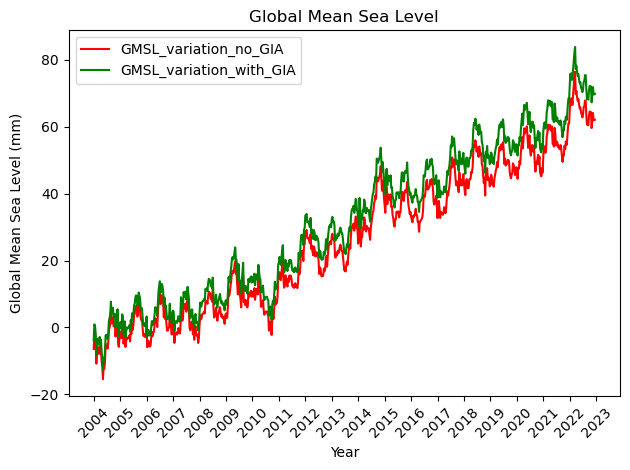

In [8]:


ax = filter_sea_df.plot(x='date_formatted', y= ['GMSL_variation_no_GIA','GMSL_variation_with_GIA'],color = ['r','g'])
#ax.xaxis.set_major_formatter(md.DateFormatter('%Y'))
#x = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2.0,2.1,2.2]
x = list(range(21))


# Create a list of years for x-ticks
years = list(range(2003, 2026))

# Set x-ticks and labels
ax.xaxis.set_major_locator(MaxNLocator(nbins=22))
ax.set_xticklabels(years, rotation=45)

#ax.set_xticklabels(years)
plt.xlabel('Year')
plt.ylabel('Global Mean Sea Level (mm)')
plt.title('Global Mean Sea Level')
plt.tight_layout()
plt.show()

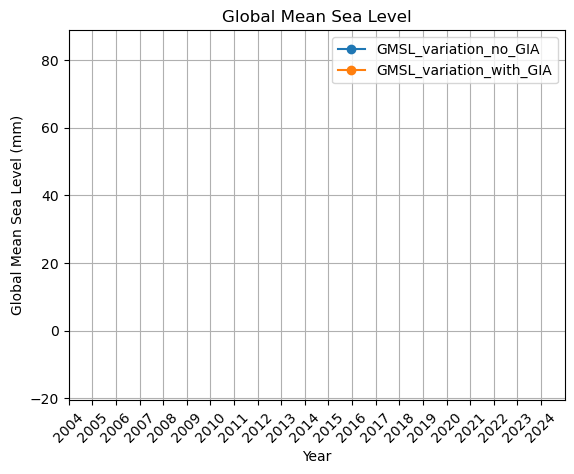

In [9]:
ax1 = filter_sea_df.plot(x='date_formatted', y= ['GMSL_variation_no_GIA','GMSL_variation_with_GIA'], marker='o')


ax1.set_xlim([pd.to_datetime('2004-01-01'), pd.to_datetime('2024-12-31')])

# Create a list of years for x-ticks
years = list(range(2004, 2025))
tick_positions = [pd.to_datetime(f"{year}-01-01") for year in years]

# Set x-ticks and labels
ax1.set_xticks(tick_positions)
ax1.set_xticklabels(years, rotation=45)

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Global Mean Sea Level (mm)')
plt.title('Global Mean Sea Level')
plt.grid()
plt.show()